In [1]:
import geopandas as gpd

In [2]:
dispositions = gpd.read_file('data/mineral_disposition/mineral_disposition.shp')

dispo_part = gpd.read_file('data/mineral_disp_partial_cells/mineral_disp_partial_cells.shp')

In [3]:
figh_dispos = dispositions[dispositions.OWNERS.str.contains('Faith')]

In [4]:
figh_dispos_part = dispo_part[dispo_part.OWNERS.str.contains('Faith')]

In [5]:
dispositions.centroid

0       POINT (603048.1877534462 6482803.859342211)
1       POINT (471096.8583876095 6359180.253102098)
2       POINT (213107.7302730975 6447294.200629468)
3       POINT (219905.1391658014 6450825.584254365)
4       POINT (220799.8599835827 6462248.874234542)
                           ...                     
5447     POINT (219992.327856311 6401223.209322074)
5448    POINT (499837.3832856638 6136953.235294266)
5449    POINT (499189.1658359562 6134632.925130632)
5450    POINT (470719.9520846204 6551582.991333066)
5451    POINT (468126.3783594915 6547197.693768341)
Length: 5452, dtype: object

Typically I would go straight to SEDAR to find a NI 43-101 filing for the deposit. But Faith in Gravity is . 

In [6]:
import folium

figh_dispos_wm = figh_dispos.to_crs({'init':'epsg:4326'})

map = folium.Map()

folium.GeoJson(figh_dispos).add_to(map)
folium.GeoJson(figh_dispos_part).add_to(map)

for row in figh_dispos_wm.centroid:
    map.add_child(folium.CircleMarker([row.y, row.x]))

map

Find the k nearest neighbors - kdtree

(The cKDTree is a Cython wrapped C++ implementation of the KDTree that offers some substantial performance benefits.)[https://stackoverflow.com/questions/6931209/difference-between-scipy-spatial-kdtree-and-scipy-spatial-ckdtree0]

In [7]:
from scipy.spatial import cKDTree

not_figh_dispos = dispositions[~dispositions.OWNERS.str.contains('Faith')]

In [8]:
import numpy as np

nfg_centroids = np.vstack((not_figh_dispos.centroid.x.values, not_figh_dispos.centroid.y.values)).T

In [9]:
fg_centroids = np.vstack((figh_dispos.centroid.x.values, figh_dispos.centroid.y.values)).T

In [10]:
nfg_tree = cKDTree(nfg_centroids)

In [24]:
#dispos_10km = nfg_tree.query_ball_point(fg_centroids, r = 10000)
dispos_radius = nfg_tree.query_ball_point(fg_centroids, r = 40000)

In [25]:
import itertools

dispos_rad_index = list(set(itertools.chain.from_iterable(dispos_radius)))

fig_neighbors = not_figh_dispos.iloc[dispos_rad_index]

In [27]:
black_lake_coords = [59.51684, -105.26733]

map = folium.Map(location=black_lake_coords, zoom_start = 9)

folium.GeoJson(figh_dispos).add_to(map)
folium.GeoJson(figh_dispos_part).add_to(map)
folium.GeoJson(fig_neighbors, style_function=lambda feature: {
        'fillColor': '#FF0000',
        'color' : '#FF0000',
        'weight' : 1,
        'fillOpacity' : 0.5,
        }).add_to(map)

map

In [28]:
fig_neighbors.OWNERS.value_counts()

ALX Uranium Corp.: 100.000%               92
SHAUN SPELLISCY: 100.000%                 39
UEX CORPORATION: 100.000%                 31
Fission 3.0 Corp.: 100.000%               16
PUREPOINT URANIUM GROUP INC.: 100.000%     7
FORUM ENERGY METALS CORP.: 100.000%        6
ISOENERGY LTD.: 100.000%                   4
EAGLE PLAINS RESOURCES LTD.: 100.000%      3
Chris Knudsen: 100.000%                    3
STRONGBOW EXPLORATION INC.: 100.000%       2
MANSON CREEK RESOURCES LTD.: 100.000%      2
Ryan Kalt: 100.000%                        1
Name: OWNERS, dtype: int64

In [16]:
#TODO:
# - Go with the drillhole map, try to see if they've sunk any recently
# - Keep looking for issuers
# 

How many were staked after? 

Closest drill holes? 

What's in a name? - how anomalous is the gravity anomaly? 

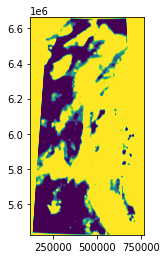

In [41]:
import rasterio
from rasterio.plot import show

import matplotlib.pyplot as plt

%matplotlib inline


bouger_raster = rasterio.open('data/Gravity_bouger_anomaly/Gravity_bouger_anomaly.tif')

show(bouger_raster, adjust=True)

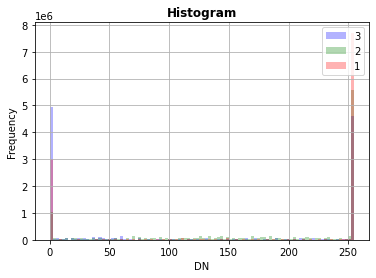

In [44]:
from rasterio.plot import show_hist

show_hist(bouger_raster, bins=100, lw=0.0, stacked=False, alpha=0.3,
       histtype='stepfilled', title="Histogram")

Coincident mag anomaly? 